

# Project: Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project,we will be focusing on analysing information gathered from medical appointments in Brazil. The dataset contains information about patients, including different medical conditions and whether they showed up for their appointsments or not.
In our analysis we will be focusing on factors that may contribute to a patient showing up or not for their appointments and some relationship between variables
We will be answering questions such as:
* which gender is likely to show up for their appointment 
* What is the relationship between patients enrolled in the [Bolsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) and attendance
* Are patients with a particular kind of condition more likely to show up for their appointment?
* Which age group would likely show up or not
* What is the relationship between attendance and patients who receve sms and those who do not etc

The dataset we will be analysing is originally from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments). You may find additional information about this dataset.


In [63]:
#import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [64]:
# let's load data and inspect the first few rows

df = pd.read_csv("noshowappointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [65]:
# let's inspect last few bottom rows

df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [66]:
# let's check for number of rows and columns

df.shape

(110527, 14)

In [67]:
# let's check for nun null columns and data types
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [68]:
# let's check for duplicated values

df.duplicated().sum()

0

In [69]:
# let's get summary statistics of our data

df.describe()                      # it shows negative minimum age

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [70]:
#  let's check for ages less than 1 negative ages 

df[df['Age'] < 1].count()

PatientId         3540
AppointmentID     3540
Gender            3540
ScheduledDay      3540
AppointmentDay    3540
Age               3540
Neighbourhood     3540
Scholarship       3540
Hipertension      3540
Diabetes          3540
Alcoholism        3540
Handcap           3540
SMS_received      3540
No-show           3540
dtype: int64

In [71]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [72]:
# let's check for number of unique values per column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [73]:
# let's check for unique values in this column
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

#### From the data above, we checked for the first 5 top and bottom rows to see how our data look like.  From our inspection, our data has 110527 rows and 14 columns,no null values and there are no duplicate rows.
#### In the 'Handcap' column,we should have 2 unique values(1,0) but there are 0,1,2,3,4 so we will have to drop rows with values 2,3,4
#### We will correct any mispelling of the columns.
#### We checked for data types  of the columns and we will be converting columns to appropriate data type  to allow for easy manipulation.
#### The 'AppointmentDay' and 'ScheduledDay' columns will be splitted so we get dates only.The time parts will be dropped since it's not beneficial to our analysis.
#### We checked for a quick summary statistics  of our data and there is an outlier which is age of  -1.  Since that is the only data point with a negative,we can drop it. Further investigation showed there are patients with ages less than 1 represented with zeros. Possible reason would be that, those patients are babies less than a year old .
#### Will will drop the 'PatiendID'  and 'AppointmentID' columns since our analysis does not include that.
#### Let's note that our categorigal variables are encoded with 1's and 0's as observations , for 'Yes' and 'No' respectively.
#### The 'No_show'  column  has been encoded with No/Yes, where 'No' is patient  showed up and 'Yes' is patient did not show up. We will rename the column and fix the responses to match colum name to avoid any confusion. 
#### We will rename all column names to a similar naming format for consistency.

#### Let's begin cleaning our dataset and modify our data as mentioned above.

In [74]:
#let's drop the negative age row
df.drop(df[df['Age']==-1].index,inplace = True)

#let's confirm 
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [75]:
# let's drop rows with outliers 2,3,4 in 'Handcap' column
df.drop(df[(df['Handcap']== 2) |(df['Handcap']==3) | (df['Handcap']==4)].index,inplace=True)

#let's confirm 

df[(df['Handcap']== 2) |(df['Handcap']==3) | (df['Handcap']==4)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [76]:
# let's drop patientid column

df.drop(['PatientId'],axis=1,inplace=True)
df.drop(['AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [77]:
#let's split the date and time columns

split_col1 = df['AppointmentDay'].str.split('T',expand=True)
split_col2 = df['ScheduledDay'].str.split('T',expand =True)

#let's confirm whether it has been splitted

print(split_col1)
print(split_col2)

                 0          1
0       2016-04-29  00:00:00Z
1       2016-04-29  00:00:00Z
2       2016-04-29  00:00:00Z
3       2016-04-29  00:00:00Z
4       2016-04-29  00:00:00Z
...            ...        ...
110522  2016-06-07  00:00:00Z
110523  2016-06-07  00:00:00Z
110524  2016-06-07  00:00:00Z
110525  2016-06-07  00:00:00Z
110526  2016-06-07  00:00:00Z

[110327 rows x 2 columns]
                 0          1
0       2016-04-29  18:38:08Z
1       2016-04-29  16:08:27Z
2       2016-04-29  16:19:04Z
3       2016-04-29  17:29:31Z
4       2016-04-29  16:07:23Z
...            ...        ...
110522  2016-05-03  09:15:35Z
110523  2016-05-03  07:27:33Z
110524  2016-04-27  16:03:52Z
110525  2016-04-27  15:09:23Z
110526  2016-04-27  13:30:56Z

[110327 rows x 2 columns]


In [78]:
# let's rename the date columns

split_col1.rename(columns={0:'Appointment_day'},inplace=True)
split_col2.rename(columns={0:'Scheduled_day'},inplace=True)

In [79]:
#let's confirm our renamed columns

print(split_col1)
print(split_col2)

       Appointment_day          1
0           2016-04-29  00:00:00Z
1           2016-04-29  00:00:00Z
2           2016-04-29  00:00:00Z
3           2016-04-29  00:00:00Z
4           2016-04-29  00:00:00Z
...                ...        ...
110522      2016-06-07  00:00:00Z
110523      2016-06-07  00:00:00Z
110524      2016-06-07  00:00:00Z
110525      2016-06-07  00:00:00Z
110526      2016-06-07  00:00:00Z

[110327 rows x 2 columns]
       Scheduled_day          1
0         2016-04-29  18:38:08Z
1         2016-04-29  16:08:27Z
2         2016-04-29  16:19:04Z
3         2016-04-29  17:29:31Z
4         2016-04-29  16:07:23Z
...              ...        ...
110522    2016-05-03  09:15:35Z
110523    2016-05-03  07:27:33Z
110524    2016-04-27  16:03:52Z
110525    2016-04-27  15:09:23Z
110526    2016-04-27  13:30:56Z

[110327 rows x 2 columns]


In [80]:
# let's drop the columns with extracted time

split_col1.drop(columns=[1],axis=1,inplace=True)
split_col2.drop(columns=[1],axis=1,inplace=True)

In [81]:
#let's confirm dropped columns

print(split_col1)
print(split_col2)

       Appointment_day
0           2016-04-29
1           2016-04-29
2           2016-04-29
3           2016-04-29
4           2016-04-29
...                ...
110522      2016-06-07
110523      2016-06-07
110524      2016-06-07
110525      2016-06-07
110526      2016-06-07

[110327 rows x 1 columns]
       Scheduled_day
0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
...              ...
110522    2016-05-03
110523    2016-05-03
110524    2016-04-27
110525    2016-04-27
110526    2016-04-27

[110327 rows x 1 columns]


In [82]:
# let's append both new extracted date columns

new_date_cols=pd.concat([split_col2,split_col1],axis=1)
new_date_cols


,Scheduled_day,Appointment_day
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29
...,...,...
110522,2016-05-03,2016-06-07
110523,2016-05-03,2016-06-07
110524,2016-04-27,2016-06-07
110525,2016-04-27,2016-06-07


In [83]:
#let's append our newly joined date columns to our original dataframe at index 2

df = pd.concat([df,new_date_cols],  axis = 1)
df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_day,Appointment_day
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29


In [84]:
#let's drop our original date and time columns

df = df.drop(['ScheduledDay','AppointmentDay'],axis=1)


In [85]:
#let's rename our columns to have same format

df=df.rename(columns={'AppointmentID':'Appointment_id','Hipertension':'Hypertension','Handcap':'Handicap','No-show':'Showed_up'})

In [86]:
#let's confirm our renamed columns

df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Showed_up',
       'Scheduled_day', 'Appointment_day'],
      dtype='object')

In [87]:
#let's replace No/Yes with Yes/No

df['Showed_up']=df['Showed_up'].replace(['No','Yes'],['Yes','No'])

#let's confirm changes
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Scheduled_day,Appointment_day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29,2016-04-29
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-04-29,2016-04-29
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-04-29,2016-04-29
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,2016-04-29,2016-04-29
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,2016-04-29,2016-04-29


In [88]:
## let's convert our date columns to datetime

df[['Scheduled_day','Appointment_day']] =df[['Scheduled_day','Appointment_day']].apply(pd.to_datetime)


In [89]:
#let's confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Gender           110327 non-null  object        
 1   Age              110327 non-null  int64         
 2   Neighbourhood    110327 non-null  object        
 3   Scholarship      110327 non-null  int64         
 4   Hypertension     110327 non-null  int64         
 5   Diabetes         110327 non-null  int64         
 6   Alcoholism       110327 non-null  int64         
 7   Handicap         110327 non-null  int64         
 8   SMS_received     110327 non-null  int64         
 9   Showed_up        110327 non-null  object        
 10  Scheduled_day    110327 non-null  datetime64[ns]
 11  Appointment_day  110327 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.9+ MB


In [90]:
#let's check our cleaned data

df.head(3)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Scheduled_day,Appointment_day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29,2016-04-29
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-04-29,2016-04-29
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-04-29,2016-04-29


 We have concluded all the cleaning we metioned above. For clarification, the 'No-show' column has been renamed 'Showed_up' and encoded with same 'Yes' and 'No' but this time, 'Yes' is for patients who showed up and 'No' is patients who did not show up  for  their appointments.



<a id='eda'></a>
## Exploratory Data Analysis

In this section,we will begin to explore our data to answer questions and find patterns

###  Which gender is more likely to show up for appointment

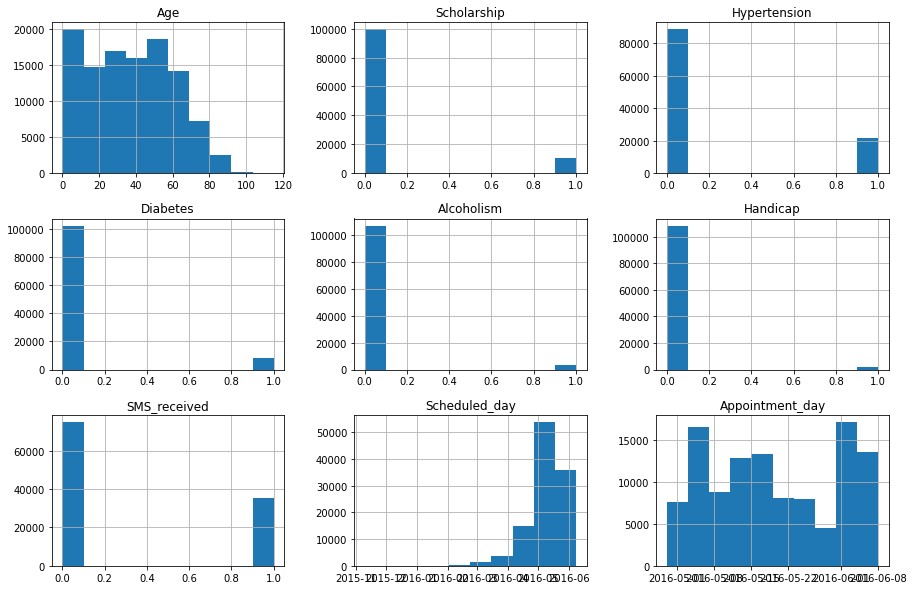

In [91]:
#first let's look at distribution of our data

df.hist(figsize=(15,10));

In [92]:
# number of patients that showed up or not based on gender

numb_fract=df.groupby('Showed_up')['Gender'].value_counts()

numb_fract

Showed_up  Gender
No         F         14568
           M          7710
Yes        F         57162
           M         30887
Name: Gender, dtype: int64

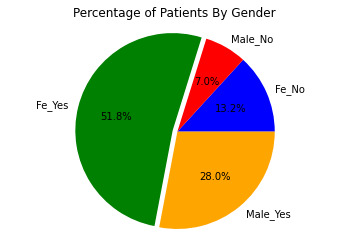

In [93]:
# let's plot a pie chart to represent percentage of the data above

label='Fe_No','Male_No','Fe_Yes','Male_Yes'
my_explode =(0,0,0.05,0)
my_colours = ['blue','red','green','orange']
plt.pie(numb_fract,labels = label,autopct='%1.1f%%', colors = my_colours,explode =my_explode)

plt.title('Percentage of Patients By Gender')

plt.axis('equal');





 From our chart it shows,Females are more than 50% likely to show up for their appointments. That is about twice the  percentage of men. Although we do not know what may be the factors that influence this turn out

#### Age group that show or do not show up for appointments

In [94]:
# let's create age groups for our ages

df['Age_bins'] = pd.qcut(df.Age,5,labels=['0-20','21-40','41-60','61-80','81-115'])
df

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Scheduled_day,Appointment_day,Age_bins
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29,2016-04-29,81-115
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-04-29,2016-04-29,61-80
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-04-29,2016-04-29,81-115
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,2016-04-29,2016-04-29,0-20
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,2016-04-29,2016-04-29,61-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,Yes,2016-05-03,2016-06-07,61-80
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,Yes,2016-05-03,2016-06-07,61-80
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,Yes,2016-04-27,2016-06-07,21-40
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,Yes,2016-04-27,2016-06-07,41-60


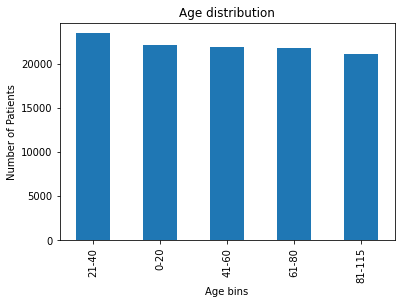

In [95]:
#let's explore the distribution of the age groups

df['Age_bins'].value_counts().plot(kind = 'bar')
plt.xlabel('Age bins')
plt.ylabel('Number of Patients')
plt.title('Age distribution')

plt.show();

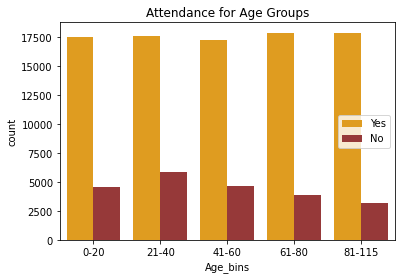

In [96]:
# let's create a bar chart to explore attendance and age groups

figsize=(8,8)
colours=['orange','brown']
sns.countplot(x=df['Age_bins'], hue=df['Showed_up'],data=df,palette=colours)
plt.title("Attendance for Age Groups");
plt.legend(loc='center right')
plt.show();


From our chart above,age groups 61-80 and 81-115 have high attendance although there is no significant  difference compared to the other age groups

#### let's explore relationship between sms received and attendance

In [97]:
#let's group data

df.groupby(['SMS_received'])[['Showed_up']].value_counts()

SMS_received  Showed_up
0             Yes          62389
              No           12503
1             Yes          25660
              No            9775
dtype: int64

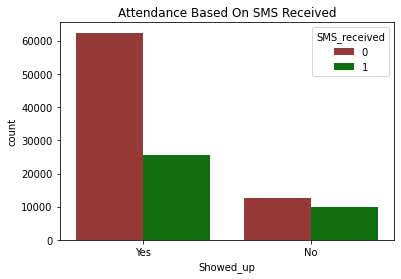

In [98]:
#let's create a bar chart to visualise the distribution

colours=['brown','green']
sns.countplot(x=df['Showed_up'],hue=df['SMS_received'],data=df,palette=colours)
plt.title('Attendance Based On SMS Received');

#### Our chart above shows those who did not receive sms showed up for their appointment. Further analysis could explore why those who received SMS could not show up instead

#### How does the Bolsa Scholarship affect attendance?

In [99]:
#let's groupby Scholarship based on attendance

df.groupby(['Showed_up'])['Scholarship'].count()

Showed_up
No     22278
Yes    88049
Name: Scholarship, dtype: int64

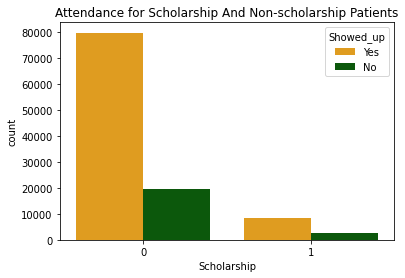

In [100]:
# let's visualise our data
colour = ['orange','darkgreen']
sns.countplot(x=df['Scholarship'],hue=df['Showed_up'],data=df,palette=colour)
plt.title('Attendance for Scholarship And Non-scholarship Patients');


#### The welfare scholarship is not a contributing factor for patients  to attend their appointments because from the chart above,patients who show up more are not enrolled in the scholarship.

#### which neighbourhood records high attendance

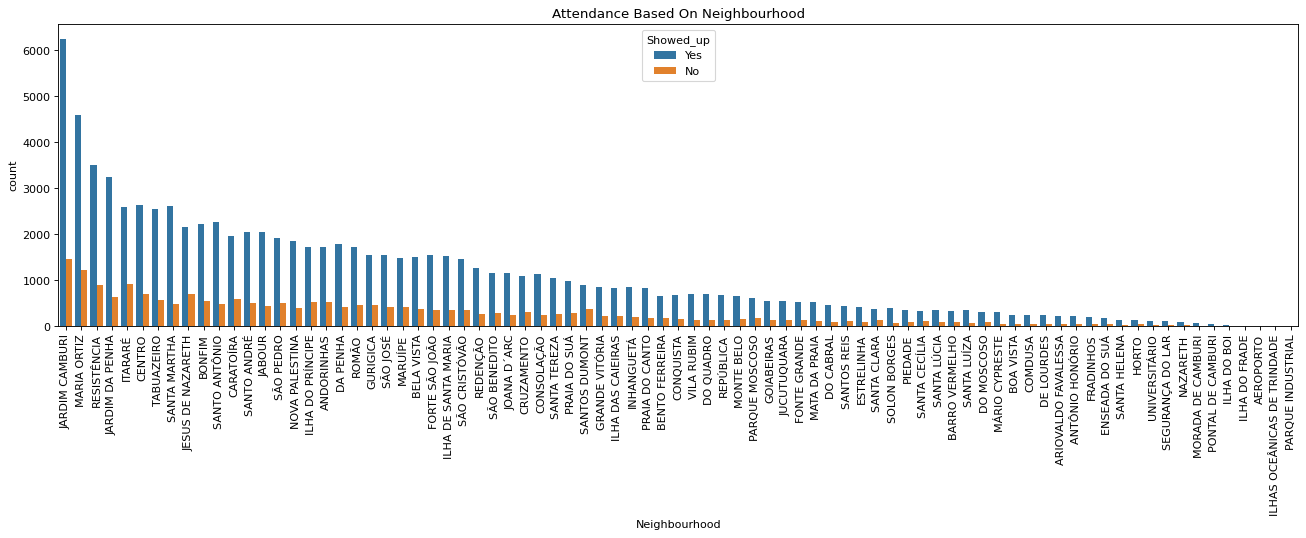

In [101]:
#let's plot a bar chart for attendance per neighbourhood

plt.figure(figsize=(20,5),dpi=80)
plt.xticks(rotation=90)
sns.countplot(x=df['Neighbourhood'], hue=df['Showed_up'],data=df,order=df['Neighbourhood'].value_counts().index)

plt.title('Attendance Based On Neighbourhood');



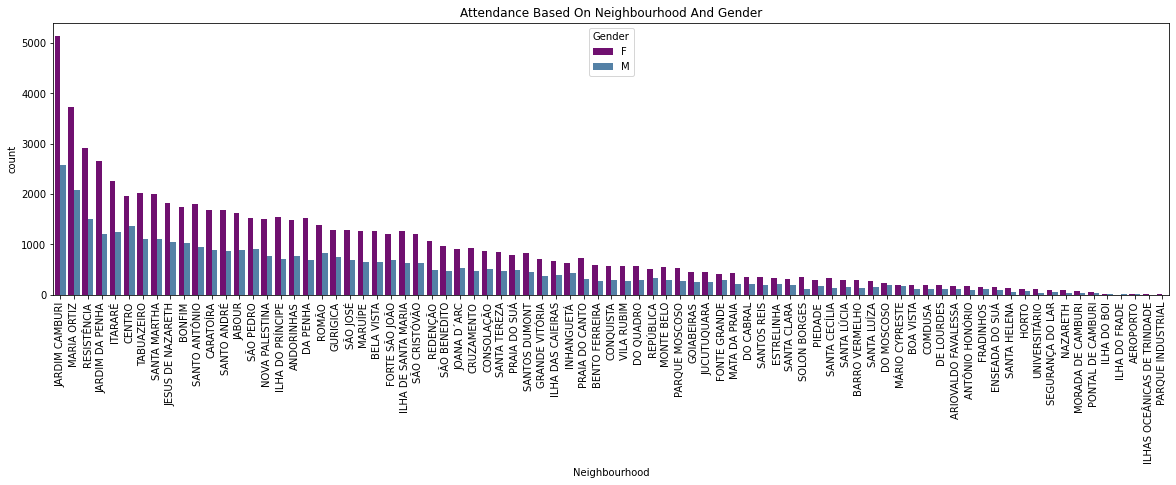

In [102]:
#let's see a correlation between females and JARDIM CAMBURI
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(x=df['Neighbourhood'],hue=df['Gender'],palette=['purple','steelblue'],order=df['Neighbourhood'].value_counts().index)
plt.title('Attendance Based On Neighbourhood And Gender')
plt.show();



 From the two charts above,The Neighbourhood named 'JARDIM CAMBURI' records high attendance from patients.We could recall that our pie chart reported over 50% attendance for females so we explored further to see which neighbourhood had high attendance based on gender and it reported same 'JARDIM CAMBURI'. More data and Further tests could establish why there is a relationship between them.

#### let's explore attendance based on medical conditions

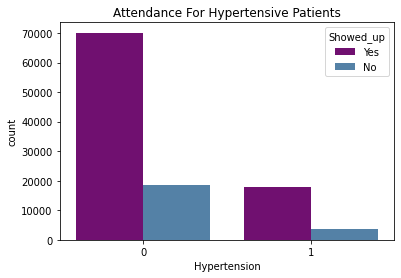

In [103]:
#let's plot a bar

sns.countplot(x=df['Hypertension'], hue=df['Showed_up'],palette=['purple','steelblue'])
plt.title('Attendance For Hypertensive Patients')
plt.show();



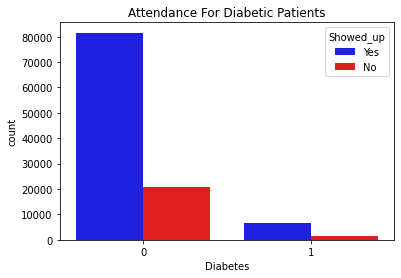

In [104]:
def my_bar(x,hue):
    out=sns.countplot(x=df['Diabetes'],hue=df['Showed_up'],palette=['blue','red'])
    plt.title('Attendance For Diabetic Patients')
    return out
    
my_bar(x=df['Diabetes'],hue=df['Showed_up'])  ; 
        
    

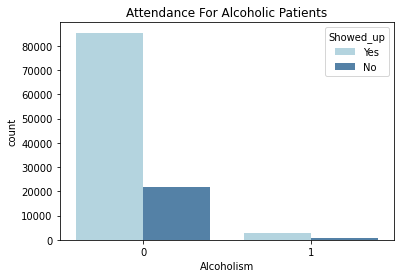

In [105]:
#bar chart for alcoholism patients

sns.countplot(x=df['Alcoholism'], hue=df['Showed_up'],palette=['lightblue','steelblue'])
plt.title('Attendance For Alcoholic Patients')
plt.show();



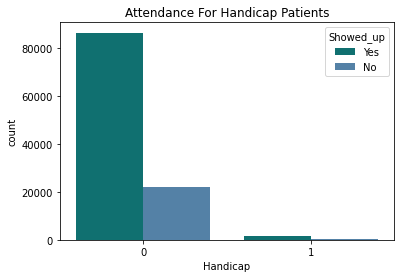

In [106]:
# bar chart for handicap patients

sns.countplot(x=df['Handicap'], hue=df['Showed_up'],palette=['teal','steelblue'])
plt.title('Attendance For Handicap Patients')
plt.show();



 From our exploratory plots above,we can observe that those who have medical conditions represented by 1,have very low attendance compared to other patients who do not have any listed medical conditions.

<a id='conclusions'></a>
## Conclusions

From exploratory analysis of our data,we observe that: 
* Females have a higher rate of more than 50% showing up for their appointments compared to males.
* Our age groups have no significant difference with regards to turn up rate.
* The Scholarship programme is not a contributing factor for patients to attend appointments as patients who are not enrolled in the scholarship recorded higher attendance than those in the programme.
* Sms notification is not a factor contributing to high attendance because patients who did not receive sms had a higher attendance rate.
* Our data reported the highest attendance in the JARDIM CAMBURI neighbourhood so we explored further, we observed that Females compared to males have a higher rate of attendance in that same neighbourhood.
* To finalise it, our data reported no relationship between any of the medical conditions listed in our data to high attendance,instead,patients with no listed condition have higher attendance rate.

Some limitation of our data include:
* We did not have enough data to draw conclusions. For example , it would have been intuitive for beneficiaries of the Scholarship programme and sms receivers to record a higher turn up rate but it turned the other way.
* We did not create further statistic tests such as controlled experiments to draw conclusions.
* There was no strong correlation between our variables since they are categorical variables that limit further statistical test to establish correlation.